In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data
from src.tools import shade
import matplotlib

In [2]:
X = np.transpose(np.genfromtxt("xi.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("tau.csv", delimiter=","))
N = 50

In [3]:
learning_rate_range = [0.05, 0.1, 0.2, 0.5, 1.0]

errors = []
for learning_rate in learning_rate_range:
    array = []
    for _ in range(10):
        network = Network(N, learning_rate=learning_rate)

        train, test = Data.sample(X, Y)
        error = network.train(train, test, t_max=100)
        array.append(error)
    array = np.mean(array, axis=0)
    errors.append(array)

0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05


KeyboardInterrupt: 

0.009485345452353137
0.20024317021138155
0.06813206168541733
0.2347981675040544
0.09820457484443149
0.26701927014099525
0.1228820629714947
0.3900522402182679
0.2138602578983774
0.4159853634099576


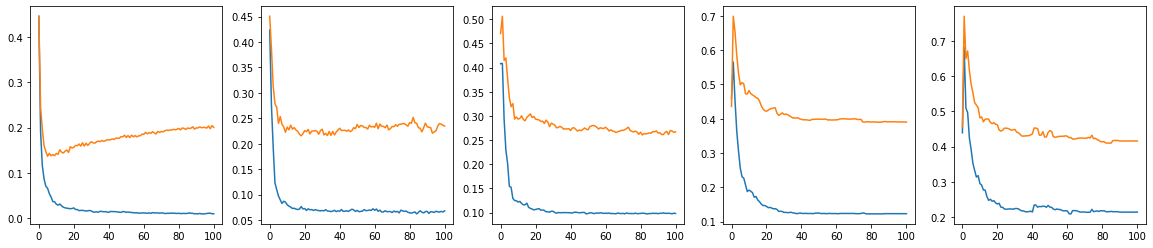

In [ ]:
fig, plots = plt.subplots(1, len(errors), figsize=(20, 4))
for (train_error, test_error), plot in zip(errors, plots):
    x = np.arange(len(train_error))
    plot.plot(x, train_error)
    plot.plot(x, test_error)
for train_error, test_error in errors:
    print(train_error[-1])
    print(test_error[-1])

In [7]:

errors = []
for _ in range(10):
    network = Network(N, learning_rate=lambda t: 1.0 / (2.0 * t))

    train, test = Data.sample(X, Y)
    error = network.train(train, test, t_max=100)
    errors.append(error)
errors = np.mean(errors, axis=0)

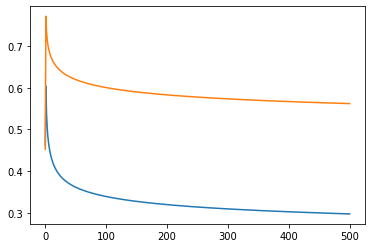

In [8]:
train_error, test_error = errors
x = np.arange(len(train_error))
plt.plot(x, train_error)
plt.plot(x, test_error)